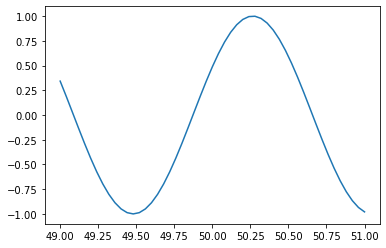

Минимум достигается в точке x =  49.48  и равен -0.9999999431561201


C:\Users\armen\AppData\Local\Temp\ipykernel_22500\3970623890.py:27: RuntimeWarning: invalid value encountered in double_scalars
  g=abs((f(x[i])-f(x[j]))/(x[i]-x[j]))


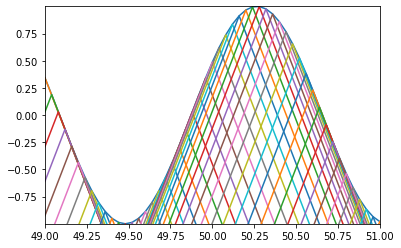

In [2]:
import numpy as np
from matplotlib import pyplot as plt


#def f(z):  #функция f(x)
#    return (0.1*z-5)**8+np.cos(0.02*z)
def f(z):   #проверка на другой функции
    return np.cos(4*z)


a = 49                  # концы отрезка
b = 51
eps = 0.02              # эпсилон
sig=1                   # "коэффициент осторожности"
N=int((b-a)/(2*eps)) + 1
h=(b-a)/(N-1)
x=np.zeros(N)
xp=np.zeros(N-1)
x[0]=a
for i in range(N):      # массив иксов на отрезке (a,b)
    x[i]=x[0]+i*h

plt.plot(x,f(x))        # график функции f(x)
plt.show()

max1=0
for i in range(N):      # вычисление М
    for j in range(N):
        g=abs((f(x[i])-f(x[j]))/(x[i]-x[j]))
        if((i!=j) and (g>max1)):
            max1=g
M=sig*max1

for i in range(N-1):
    xp[i]=(f(x[i])+M*x[i]-f(x[i+1])+M*x[i+1])/(2*M)  #точки пересечения прямых

y=np.zeros(2*N-1)
for i in range(N-1):
    y[i]=f(x[i])
    y[N+i]=f(xp[i])
y[N-1]=f(x[N-1])

xmin=np.argmin(y)
ymin=min(y)
if(xmin<N):
    print('Минимум достигается в точке x = ',x[xmin],' и равен',ymin)
else:
    print('Минимум достигается в точке x = ',xp[xmin-N],' и равен',ymin)

plt.plot(x,f(x))
for i in range(N):
    plt.plot(x,f(x[i])-M*abs(x-x[i]))  #графики ломаных
plt.xlim([a,b])
plt.ylim([min(y),max(y)])
plt.show()